DataFrame shape: (1061, 7)
Range of Selling Prices: (5000, 760000)
Median Selling Price: 45000.0
Most Common Seller Type: Individual
Bikes driven more than 50,000 kilometers: 170
Average km_driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from the year 2015 or older: 56.64467483506126
Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex_showroom_price recorded: 1278000.0 for bike: Harley-Davidson Street Bob
Total number of bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


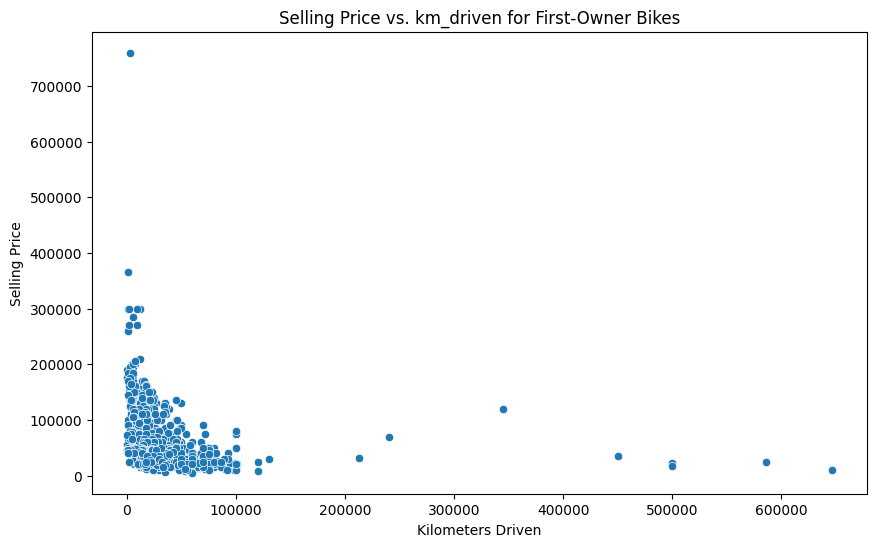

Number of bikes after removing outliers in km_driven: 1022


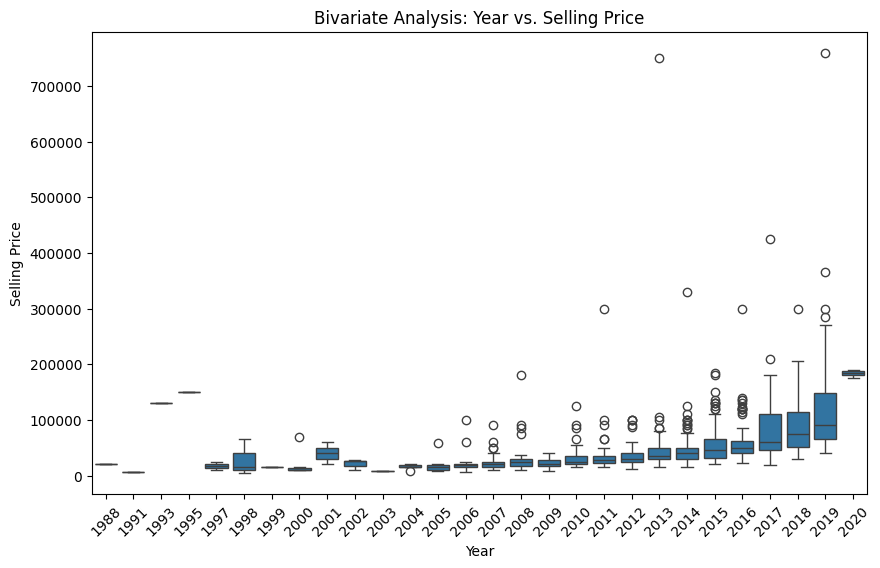

Average selling price based on bike's age:
 age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64
Bikes priced significantly above average price for their manufacturing year:
                                       name  selling_price  year
0                Royal Enfield Classic 350         175000  2019
2      Royal Enfield Classic Gunmetal Grey         150000  2018
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                    

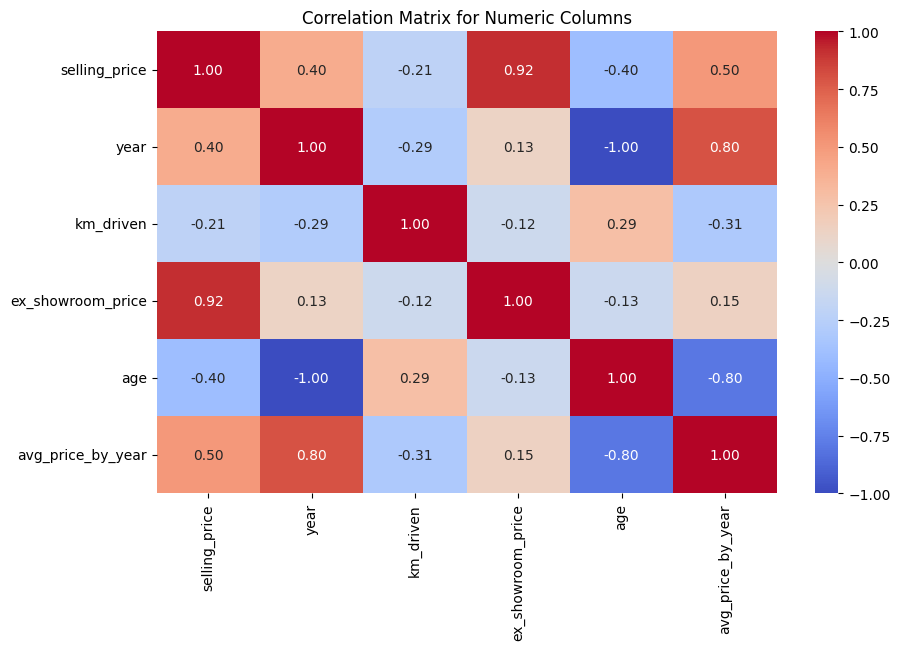

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3'  # Corrected URL for direct download
try:
    df = pd.read_csv(url)
    print(f"DataFrame shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    df = pd.DataFrame()  # Create an empty DataFrame if loading fails

# Check if the DataFrame is empty
if df.empty:
    print("Error: The dataset is empty.")
    exit()

# 1. Range of Selling Prices
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print("Range of Selling Prices:", selling_price_range)

# 2. Median Selling Price
median_selling_price = df['selling_price'].median()
print("Median Selling Price:", median_selling_price)

# 3. Most Common Seller Type
most_common_seller_type = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller_type)

# 4. Bikes Driven More Than 50,000 Kilometers
bikes_over_50k = df[df['km_driven'] > 50000].shape[0]
print("Bikes driven more than 50,000 kilometers:", bikes_over_50k)

# 5. Average km_driven Value for Each Ownership Type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:\n", avg_km_by_owner)

# 6. Proportion of Bikes from the Year 2015 or Older
old_bikes_proportion = (df[df['year'] <= 2015].shape[0] / df.shape[0]) * 100
print("Proportion of bikes from the year 2015 or older:", old_bikes_proportion)

# 7. Trend of Missing Values Across the Dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 8. Highest ex_showroom_price Recorded and Corresponding Bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
highest_bike = df.loc[df['ex_showroom_price'].idxmax(), 'name']
print("Highest ex_showroom_price recorded:", highest_ex_showroom_price, "for bike:", highest_bike)

# 9. Total Number of Bikes Listed by Each Seller Type
total_bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:\n", total_bikes_by_seller_type)

# 10. Relationship Between Selling Price and km_driven for First-Owner Bikes
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs. km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

# 11. Identify and Remove Outliers in km_driven Column Using IQR Method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]
print("Number of bikes after removing outliers in km_driven:", df_no_outliers.shape[0])

# 12. Bivariate Analysis: Year vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

# 13. Average Depreciation in Selling Price Based on Bike's Age
current_year = 2023
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average selling price based on bike's age:\n", avg_depreciation)

# 14. Bikes Priced Significantly Above Average Price for Their Manufacturing Year
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_by_year'] = df['year'].map(avg_price_by_year)
significantly_above_avg = df[df['selling_price'] > df['avg_price_by_year'] * 1.2]
print("Bikes priced significantly above average price for their manufacturing year:\n", significantly_above_avg[['name', 'selling_price', 'year']])

# Display the correlation matrix
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()  # Calculate correlation for numerical columns only
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

Car sale Dataset

DataFrame shape: (23906, 16)
         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft       

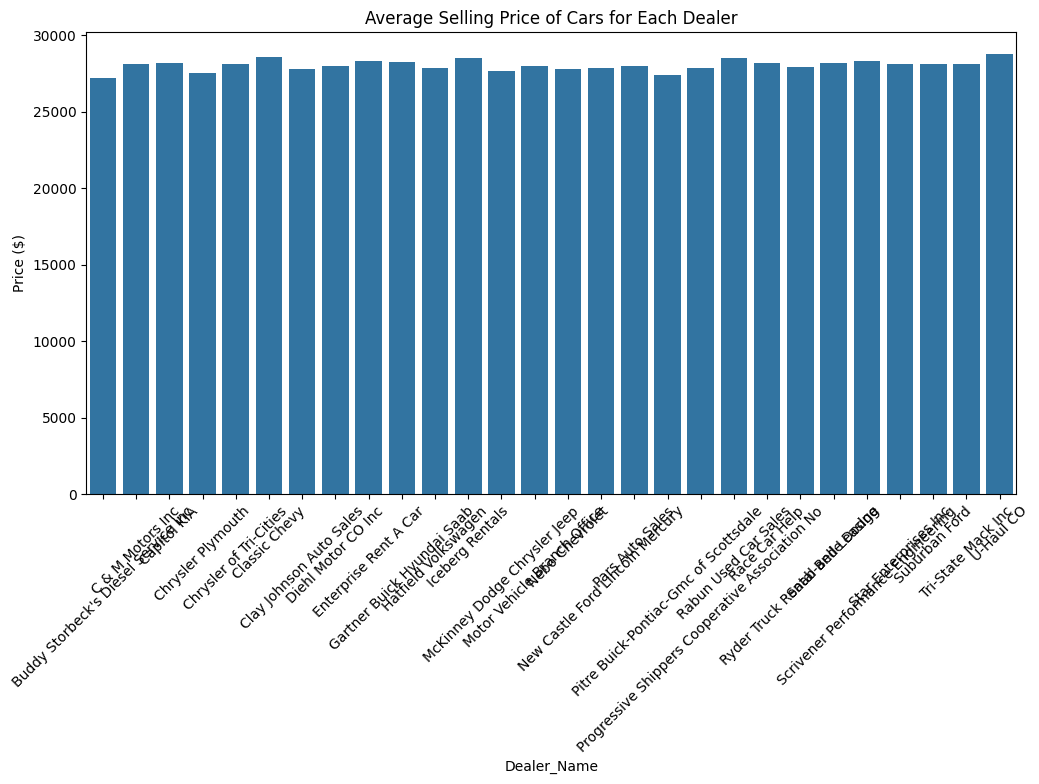

Brand with highest price variation: Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object


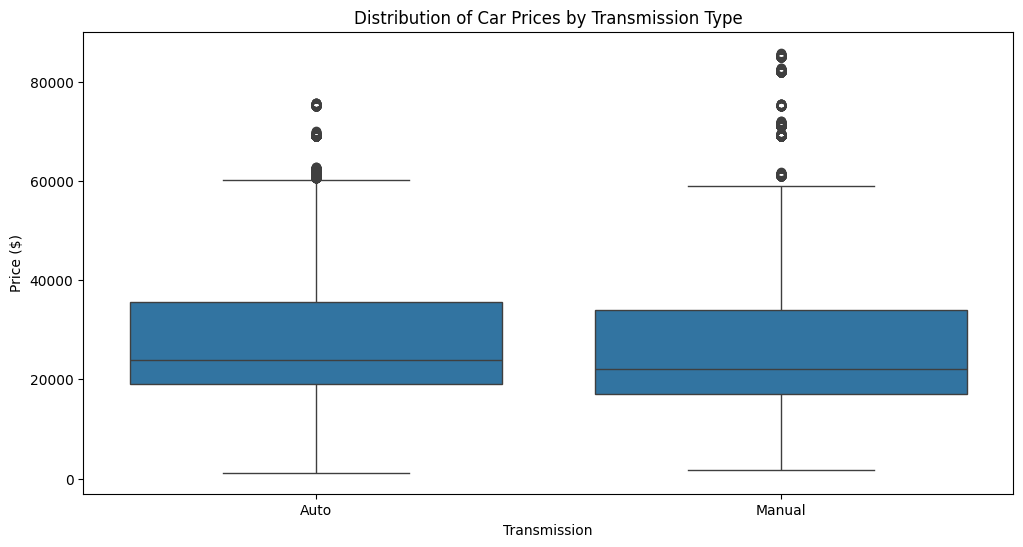

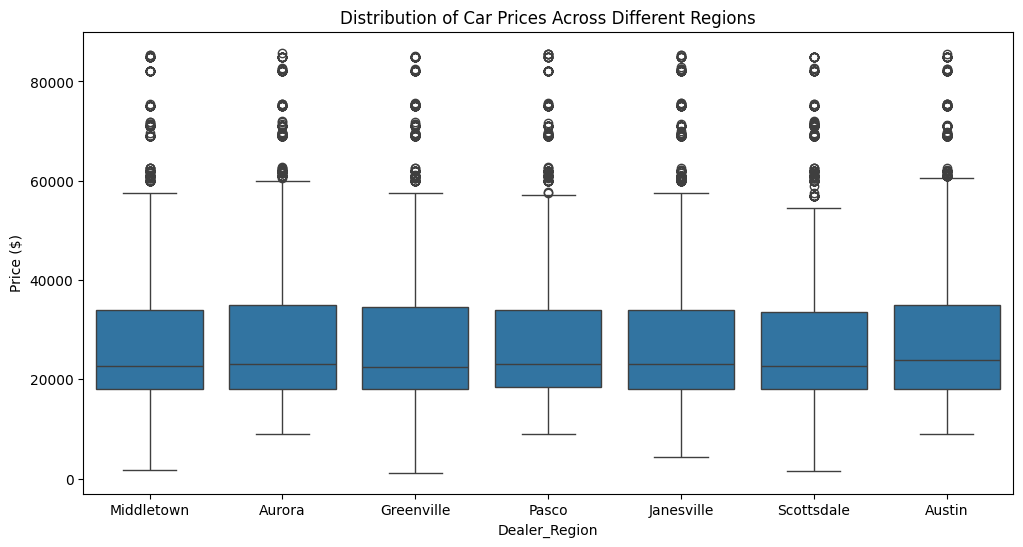

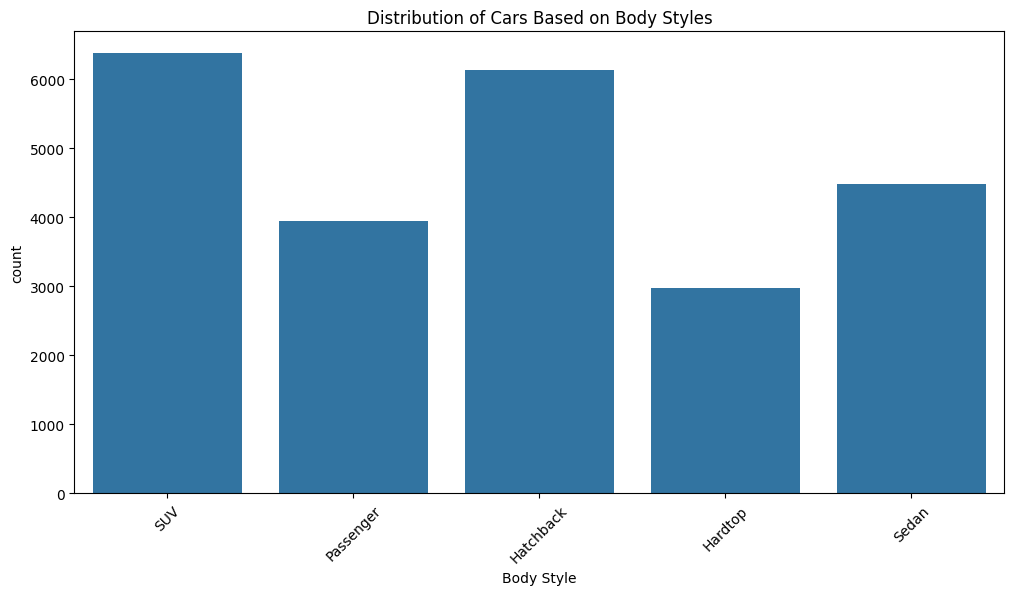

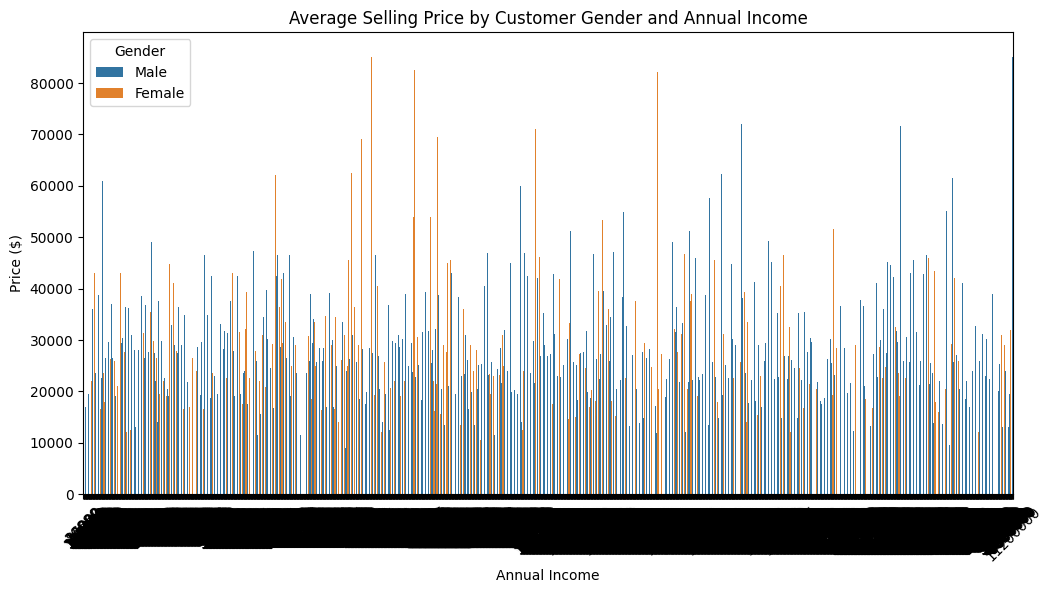

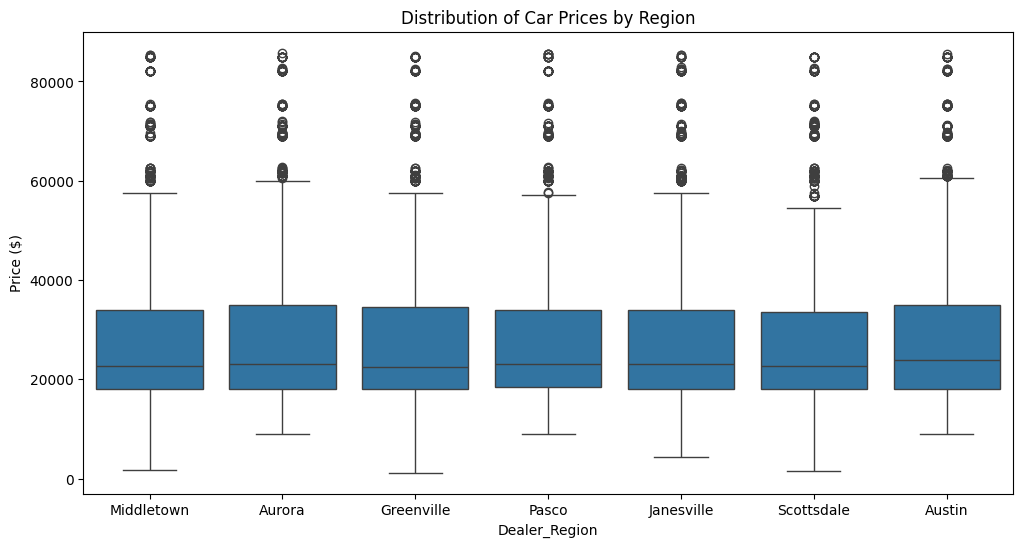

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64
                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


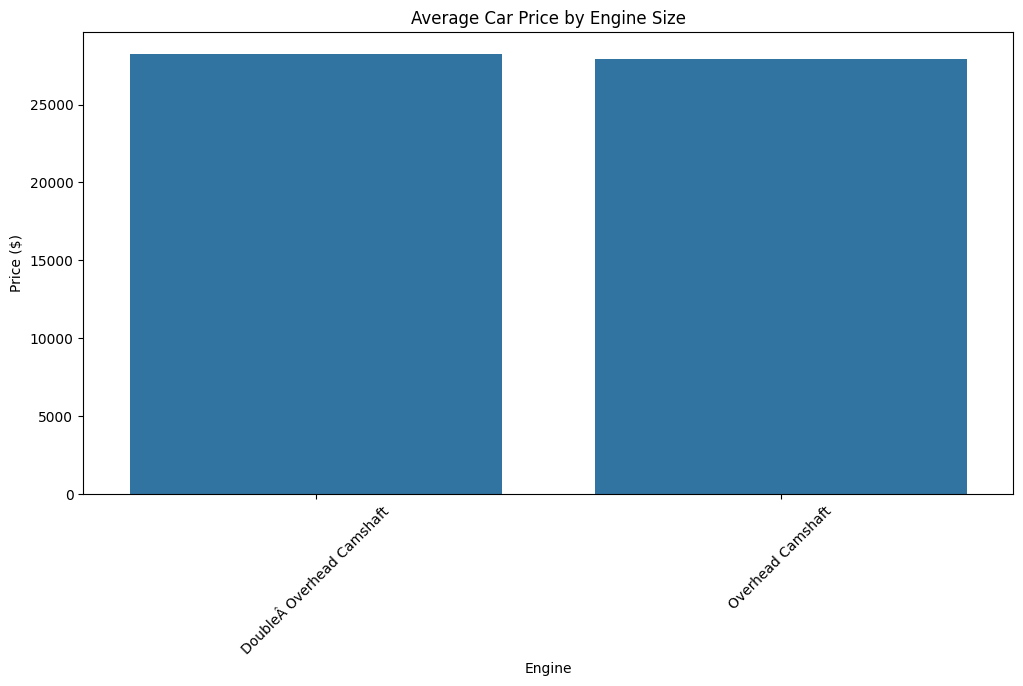

  Income Bracket     Price ($)
0           <30k  27884.297820
1        30k-60k           NaN
2        60k-90k  43000.000000
3       90k-120k  46001.000000
4          120k+  28146.802995


<ipython-input-6-5329fa1a66a3>:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = car_sale_df.groupby('Income Bracket')['Price ($)'].mean().reset_index()


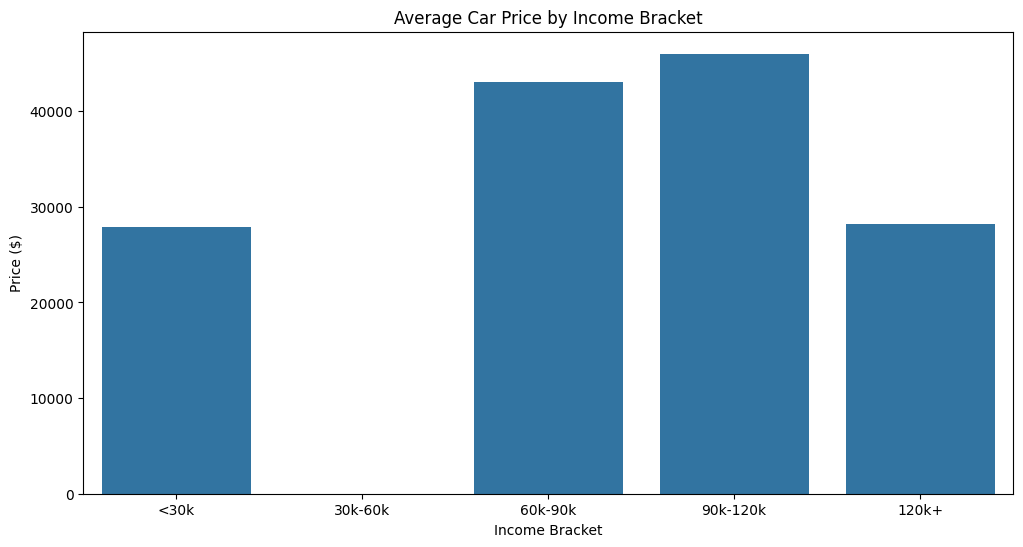

        Model  Number of Sales
0    Diamante              418
1  Silhouette              411
2       Prizm              411
3      Passat              391
4  Ram Pickup              383


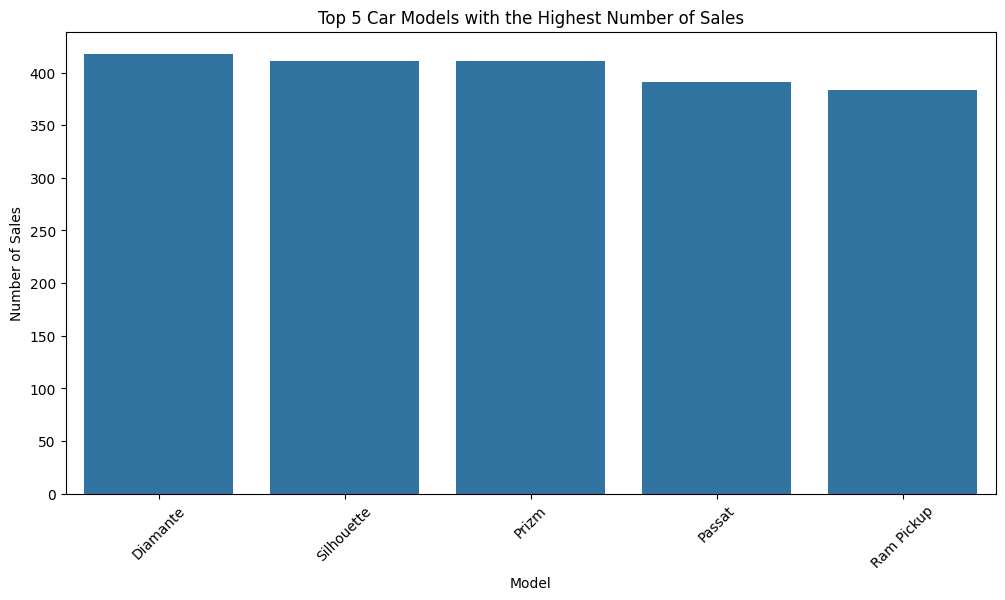

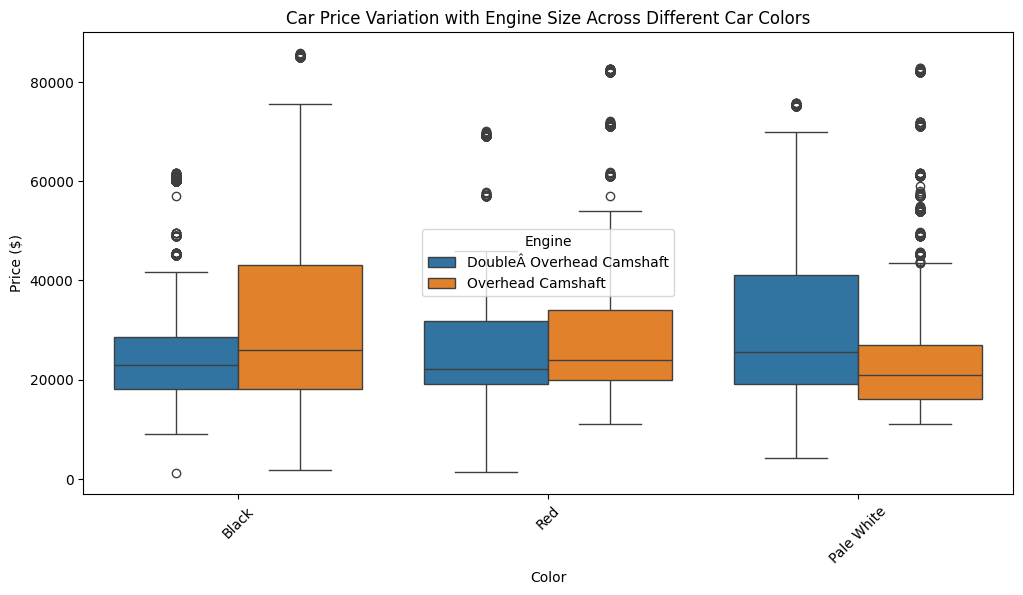

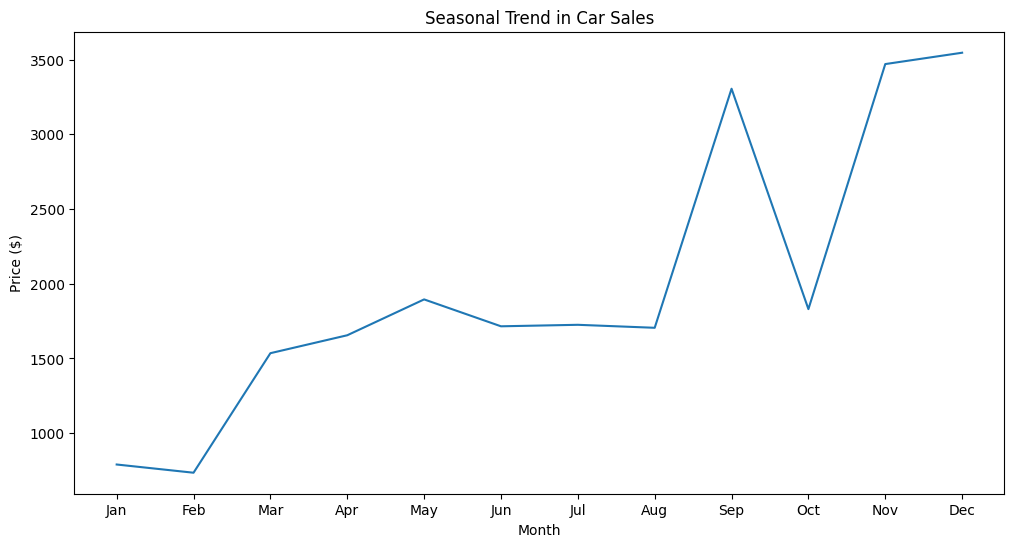

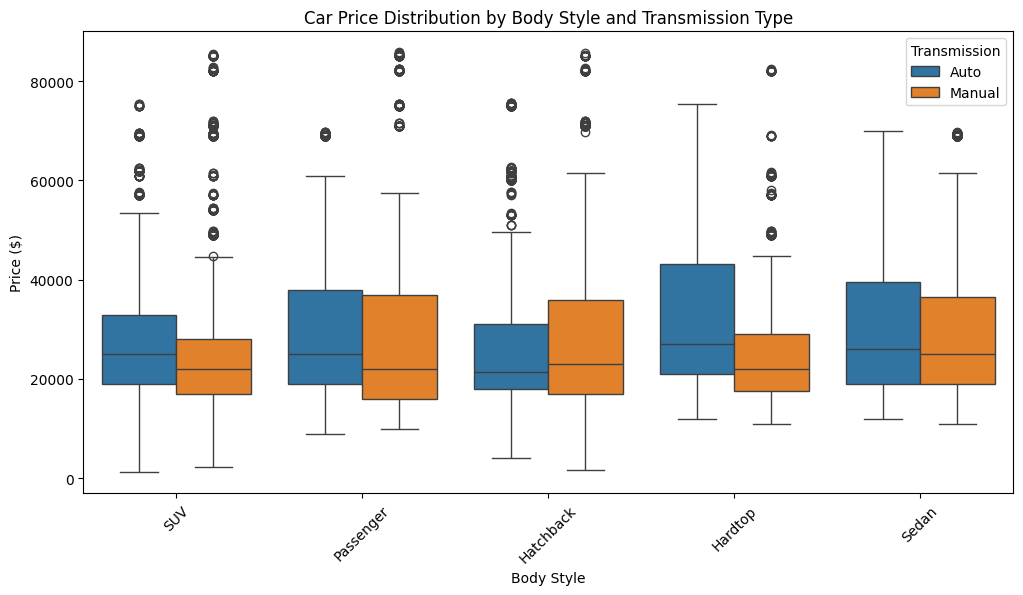

Empty DataFrame
Columns: [Model, Engine, Price ($)]
Index: []


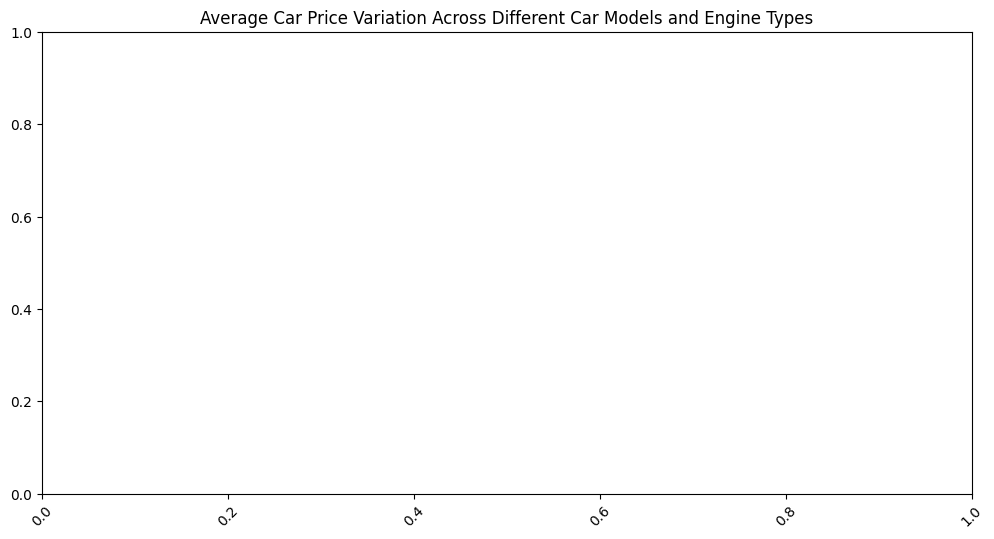

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the car sale dataset - Ensure correct URL or file path
url = 'https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U'

try:
    car_sale_df = pd.read_csv(url)  # Load data into a new DataFrame 'car_sale_df'
    print(f"DataFrame shape: {car_sale_df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    car_sale_df = pd.DataFrame()  # Create an empty DataFrame if loading fails

# Check if the DataFrame is empty
if car_sale_df.empty:
    print("Error: The dataset is empty.")
    exit()

# Display the first few rows and check the structure
print(car_sale_df.head())
print(car_sale_df.info())

# 1. Average selling price for each dealer
avg_price_per_dealer = car_sale_df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print(avg_price_per_dealer)

# Plotting the average selling price for each dealer
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_per_dealer, x='Dealer_Name', y='Price ($)')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.xticks(rotation=45)
plt.show()

# 2. Car brand with highest variation in prices
price_variation = car_sale_df.groupby('Company')['Price ($)'].std().reset_index()
highest_variation_brand = price_variation.loc[price_variation['Price ($)'].idxmax()]
print("Brand with highest price variation:", highest_variation_brand)

# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sale_df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

# 4. Distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sale_df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()

# 5. Distribution of cars based on body styles
plt.figure(figsize=(12, 6))
sns.countplot(data=car_sale_df, x='Body Style')
plt.title('Distribution of Cars Based on Body Styles')
plt.xticks(rotation=45)
plt.show()

# 6. Average selling price by customer gender and annual income
avg_price_by_gender_income = car_sale_df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_gender_income, x='Annual Income', y='Price ($)', hue='Gender')
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xticks(rotation=45)
plt.show()

# 7. Distribution of car prices by region and number of cars sold
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sale_df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.show()

# Count of cars sold by region
cars_sold_by_region = car_sale_df['Dealer_Region'].value_counts()
print(cars_sold_by_region)

# 8. Average car price by engine size
avg_price_by_engine = car_sale_df.groupby('Engine')['Price ($)'].mean().reset_index()
print(avg_price_by_engine)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_engine, x='Engine', y='Price ($)')
plt.title('Average Car Price by Engine Size')
plt.xticks(rotation=45)
plt.show()

# 9. Car prices based on customer’s annual income bracket
bins = [0, 30000, 60000, 90000, 120000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']
car_sale_df['Income Bracket'] = pd.cut(car_sale_df['Annual Income'], bins=bins, labels=labels)

avg_price_by_income_bracket = car_sale_df.groupby('Income Bracket')['Price ($)'].mean().reset_index()
print(avg_price_by_income_bracket)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_income_bracket, x='Income Bracket', y='Price ($)')
plt.title('Average Car Price by Income Bracket')
plt.show()

# 10. Top 5 car models with the highest number of sales
top_5_models = car_sale_df['Model'].value_counts().head(5).reset_index()
top_5_models.columns = ['Model', 'Number of Sales']
print(top_5_models)

# Plotting the top 5 car models
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_models, x='Model', y='Number of Sales')
plt.title('Top 5 Car Models with the Highest Number of Sales')
plt.xticks(rotation=45)
plt.show()

# 11. Car price variation with engine size across different car colors
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sale_df, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price Variation with Engine Size Across Different Car Colors')
plt.xticks(rotation=45)
plt.show()

# 12. Seasonal trend in car sales based on the date of sale
# Assuming the column containing the date is named 'Date'
car_sale_df['Sale_Date'] = pd.to_datetime(car_sale_df['Date'])  # Changed column name to 'Date'
car_sale_df['Month'] = car_sale_df['Sale_Date'].dt.month

monthly_sales = car_sale_df.groupby('Month')['Price ($)'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Price ($)')
plt.title('Seasonal Trend in Car Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 13. Car price distribution based on combinations of body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sale_df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()

# 14. Correlation between car price, engine size, and annual income of customers
# Convert 'Engine' column to numeric, handling non-numeric values
car_sale_df['Engine'] = pd.to_numeric(car_sale_df['Engine'], errors='coerce')

# Drop rows with missing values in the columns used for correlation
correlation_data = car_sale_df[['Price ($)', 'Engine', 'Annual Income']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data

# 15. Average car price variation across different car models and engine types
avg_price_by_model_engine = car_sale_df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price_by_model_engine)

# Plotting average price by model and engine type
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_model_engine, x='Model', y='Price ($)', hue='Engine')
plt.title('Average Car Price Variation Across Different Car Models and Engine Types')
plt.xticks(rotation=45)
plt.show()

Amazon sale

DataFrame shape: (1465, 16)
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1       

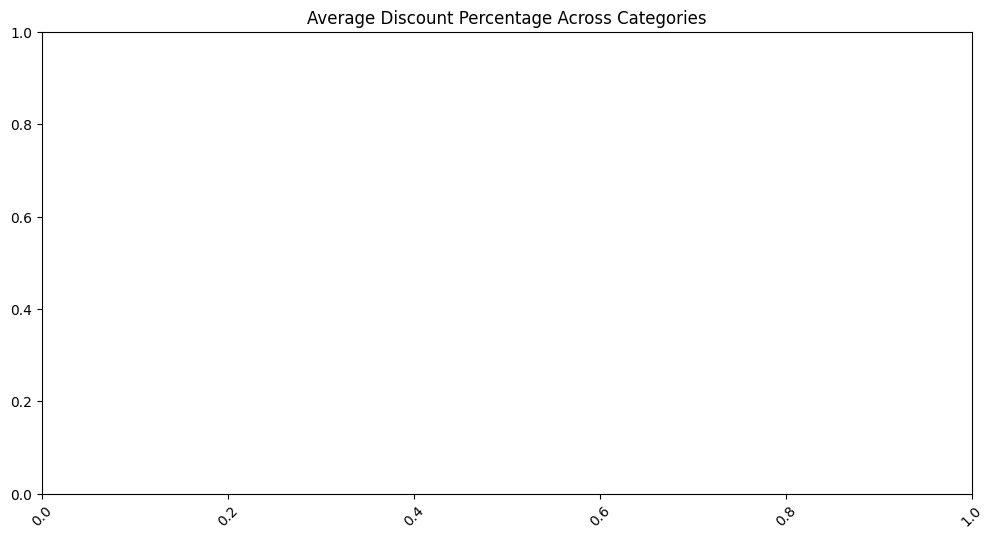

Most popular product names:
Series([], Name: count, dtype: int64)
Most popular product keywords:
Series([], Name: count, dtype: int64)
Most popular product reviews:
Empty DataFrame
Columns: [review_title, review_content]
Index: []
Correlation between discounted_price and rating:
                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


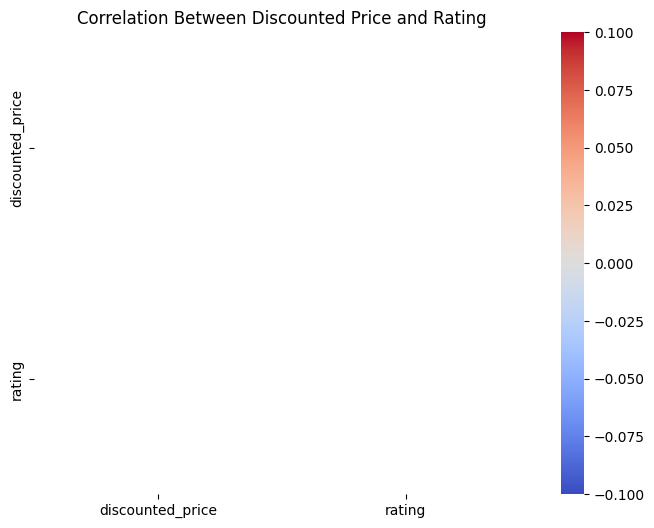

Top 5 categories based on the highest ratings:
Empty DataFrame
Columns: [category, rating]
Index: []
Products with low ratings but high discounts:
Empty DataFrame
Columns: [product_name, rating, discounted_price, actual_price]
Index: []


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Amazon sales dataset - Ensure correct URL or file path
url = 'https://drive.google.com/uc?id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB'  # Corrected URL for direct download

try:
    amazon_df = pd.read_csv(url)  # Load data into a new DataFrame 'amazon_df'
    print(f"DataFrame shape: {amazon_df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    amazon_df = pd.DataFrame()  # Create an empty DataFrame if loading fails

# Check if the DataFrame is empty
if amazon_df.empty:
    print("Error: The dataset is empty.")
    exit()

# Display the first few rows and check the structure
print(amazon_df.head())
print(amazon_df.info())

# Check the column names
print("Column names in the DataFrame:")
print(amazon_df.columns)

# Ensure 'discount_percentage' is numeric
amazon_df['discount_percentage'] = pd.to_numeric(amazon_df['discount_percentage'], errors='coerce')

# Drop NaN values in 'discount_percentage' if necessary
amazon_df = amazon_df.dropna(subset=['discount_percentage'])

# 4. Average discount percentage across categories
avg_discount_percentage = amazon_df.groupby('category')['discount_percentage'].mean().reset_index()
print("Average discount percentage across categories:")
print(avg_discount_percentage)

# Plotting the average discount percentage for each category
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_discount_percentage, x='category', y='discount_percentage')
plt.title('Average Discount Percentage Across Categories')
plt.xticks(rotation=45)
plt.show()

# 5. Most popular product names
most_popular_products = amazon_df['product_name'].value_counts().head(10)
print("Most popular product names:")
print(most_popular_products)

# 6. Most popular product keywords
# Assuming keywords are part of the product name or description
# Here we will extract keywords from product names
keywords = amazon_df['product_name'].str.split(expand=True).stack().value_counts().head(10)
print("Most popular product keywords:")
print(keywords)

# 7. Most popular product reviews
most_popular_reviews = amazon_df[['review_title', 'review_content']].head(10)
print("Most popular product reviews:")
print(most_popular_reviews)

# 8. Correlation between discounted_price and rating
correlation = amazon_df[['discounted_price', 'rating']].corr()
print("Correlation between discounted_price and rating:")
print(correlation)

# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Discounted Price and Rating')
plt.show()

# 9. Top 5 categories based on the highest ratings
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' if necessary after conversion
amazon_df = amazon_df.dropna(subset=['rating'])
top_categories_by_rating = amazon_df.groupby('category')['rating'].mean().nlargest(5).reset_index()
print("Top 5 categories based on the highest ratings:")
print(top_categories_by_rating)

# 10. Identify potential areas for improvement or optimization
# This could be a qualitative analysis based on the findings from the above analyses.
# For example, if certain categories have low ratings but high rating counts, it may indicate a need for product improvement.
# You can also look for products with high discounted prices but low ratings.

# Example analysis
low_rating_high_discount = amazon_df[(amazon_df['rating'] < 3) & (amazon_df['discounted_price'] > amazon_df['actual_price'])]
print("Products with low ratings but high discounts:")
print(low_rating_high_discount[['product_name', 'rating', 'discounted_price', 'actual_price']])

Spotify Data:Popular Hip-Hop Artists and Tracks


Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Checking for duplicate rows:
Number of duplicate rows: 27
Duplicate rows removed.


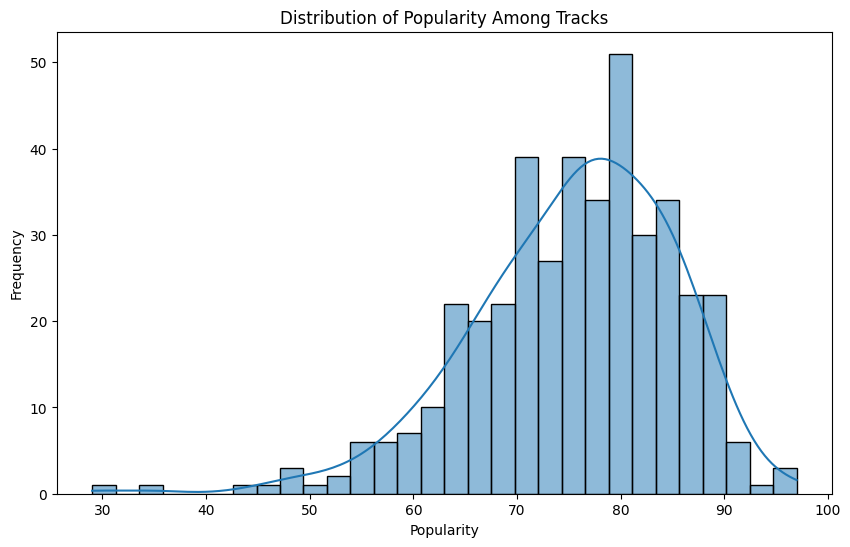

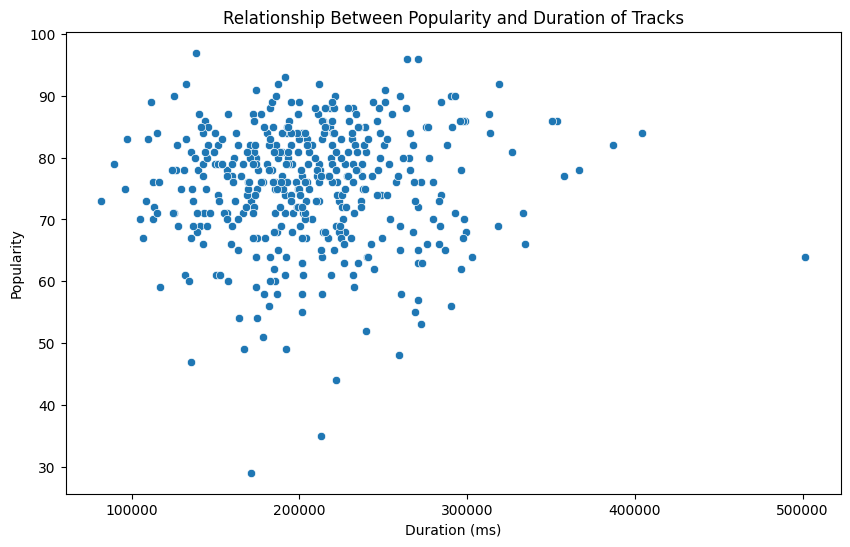

The artist with the highest number of tracks is Drake with 17 tracks.


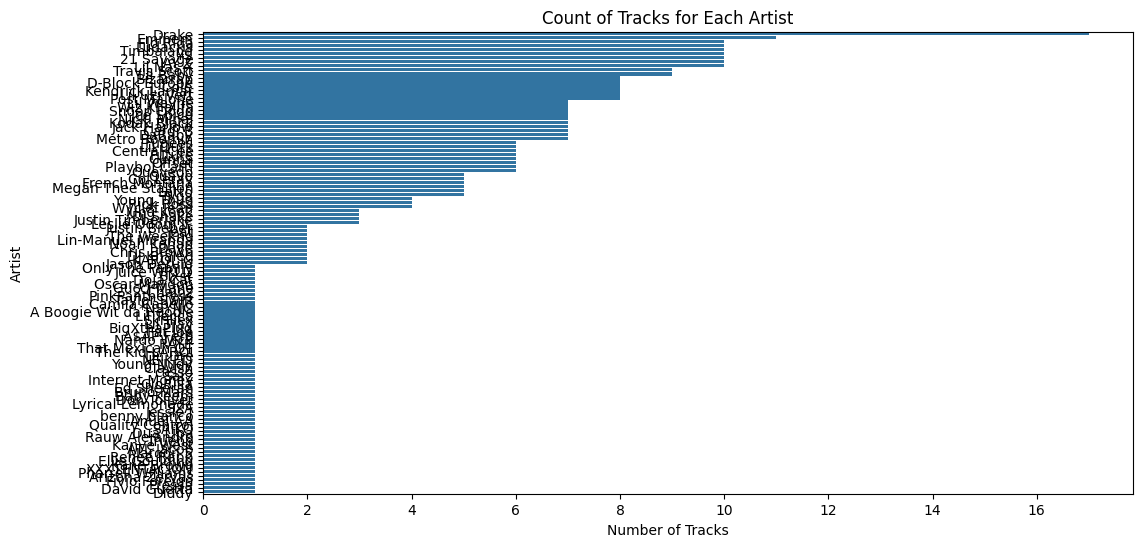

Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48
Average popularity for each of the top 5 most popular artists:
      Artist  Popularity
0      Drake   82.882353
1     Eminem   83.636364
2   Flo Rida   78.000000
3   Ludacris   63.000000
4  Timbaland   69.000000
Most popular tracks for the top 5 most popular artists:
        Artist                               Track Name  Popularity
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
300   Flo Rida                       Low (feat. T-Pain)          84
371   Ludacris                             My Chick B

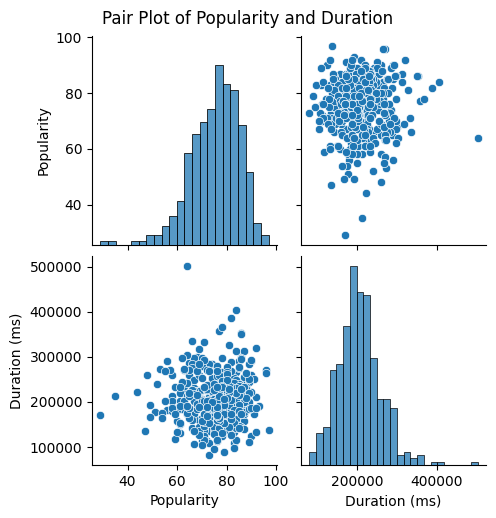

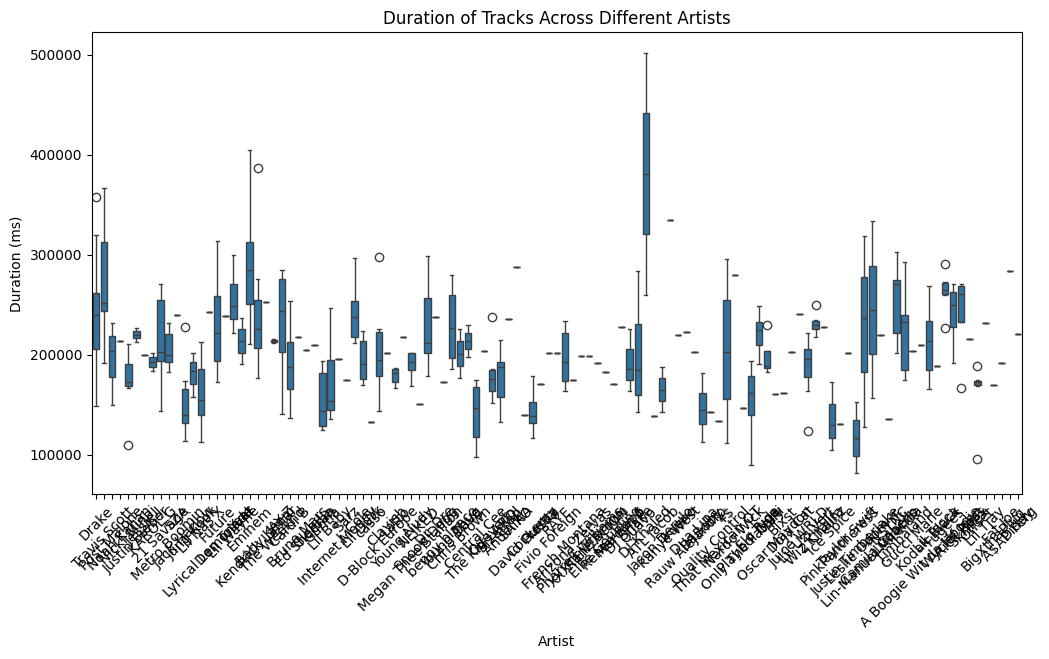

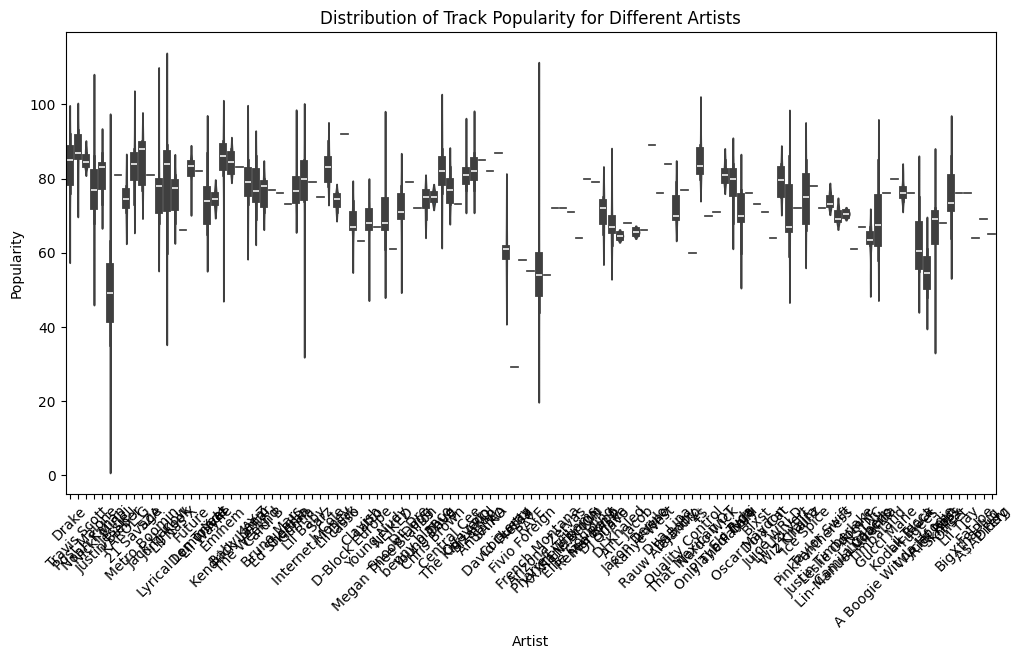

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io

# Load the dataset from Google Drive
url = 'https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view'  # Replace with your actual dataset path

def load_data_from_drive_url(url):
    """Loads data from a Google Drive URL."""
    try:
        # Get the file ID from the URL
        file_id = url.split('/')[-2]
        download_url = f'https://drive.google.com/uc?id={file_id}'

        # Download the file content using requests
        response = requests.get(download_url)
        response.raise_for_status()  # Raise an exception for bad responses

        # Read the CSV data into a DataFrame
        df = pd.read_csv(io.StringIO(response.text))
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return pd.DataFrame()

# Load the Spotify dataset
spotify_df = load_data_from_drive_url(url)

# Check if the DataFrame is empty
if spotify_df.empty:
    print("Error: The dataset is empty.")
    exit()

# 1. Check for null values and handle them
print("Checking for null values:")
print(spotify_df.isnull().sum())

# Handle null values (if any)
spotify_df = spotify_df.dropna()  # Drop rows with null values

# 2. Check for duplicate rows
print("Checking for duplicate rows:")
duplicates = spotify_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if present
if duplicates > 0:
    spotify_df = spotify_df.drop_duplicates()
    print("Duplicate rows removed.")

# Strip whitespace from column names
spotify_df.columns = spotify_df.columns.str.strip()

# Ensure 'Popularity' and 'Duration (ms)' are numeric
spotify_df['Popularity'] = pd.to_numeric(spotify_df['Popularity'], errors='coerce')
spotify_df['Duration (ms)'] = pd.to_numeric(spotify_df['Duration (ms)'], errors='coerce')

# Drop NaN values in 'Popularity' and 'Duration (ms)' if necessary
spotify_df = spotify_df.dropna(subset=['Popularity', 'Duration (ms)'])

# 3. Distribution of popularity among the tracks
plt.figure(figsize=(10, 6))
try:
    sns.histplot(spotify_df['Popularity'], bins=30, kde=True)
    plt.title('Distribution of Popularity Among Tracks')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()
except Exception as e:
    print(f"Error in histogram plot: {e}")

# 4. Relationship between popularity and duration of tracks
plt.figure(figsize=(10, 6))
try:
    sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity')
    plt.title('Relationship Between Popularity and Duration of Tracks')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Popularity')
    plt.show()
except Exception as e:
    print(f"Error in scatter plot: {e}")

# 5. Artist with the highest number of tracks
if 'Artist' in spotify_df.columns:
    artist_counts = spotify_df['Artist'].value_counts()
    top_artist = artist_counts.idxmax()
    top_artist_count = artist_counts.max()
    print(f"The artist with the highest number of tracks is {top_artist} with {top_artist_count} tracks.")

    # Display count of tracks for each artist using a countplot
    plt.figure(figsize=(12, 6))
    try:
        sns.countplot(data=spotify_df, y='Artist', order=artist_counts.index)
        plt.title('Count of Tracks for Each Artist')
        plt.xlabel('Number of Tracks')
        plt.ylabel('Artist')
        plt.show()
    except Exception as e:
        print(f"Error in countplot: {e}")
else:
    print("Error: 'Artist' column not found in the DataFrame.")

# 6. Top 5 least popular tracks
if 'Artist' in spotify_df.columns and 'Track Name' in spotify_df.columns:
    least_popular_tracks = spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
    print("Top 5 least popular tracks:")
    print(least_popular_tracks)
else:
    print("Error: One or more required columns ('Artist', 'Track Name') not found in the DataFrame.")

# 7. Average popularity for each artist among the top 5 most popular artists
if 'Artist' in spotify_df.columns:
    artist_counts = spotify_df['Artist'].value_counts()
    top_5_artists = artist_counts.nlargest(5).index
    average_popularity = spotify_df[spotify_df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().reset_index()
    print("Average popularity for each of the top 5 most popular artists:")
    print(average_popularity)
else:
    print("Error: 'Artist' column not found in the DataFrame.")

# 8. Most popular tracks for the top 5 most popular artists
if 'Artist' in spotify_df.columns and 'Track Name' in spotify_df.columns:
    most_popular_tracks = spotify_df[spotify_df['Artist'].isin(top_5_artists)].sort_values(by='Popularity', ascending=False)
    top_tracks_per_artist = most_popular_tracks.loc[most_popular_tracks.groupby('Artist')['Popularity'].idxmax()]
    top_tracks_per_artist = top_tracks_per_artist[['Artist', 'Track Name', 'Popularity']]
    print("Most popular tracks for the top 5 most popular artists:")
    print(top_tracks_per_artist)
else:
    print("Error: One or more required columns ('Artist', 'Track Name') not found in the DataFrame.")

# 9. Pair plot to visualize relationships between multiple numerical variables
try:
    sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
    plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)  # Adjust title position
    plt.show()
except Exception as e:
    print(f"Error in pair plot: {e}")

# 10. Does the duration of tracks vary significantly across different artists?
plt.figure(figsize=(12, 6))
try:
    sns.boxplot(data=spotify_df, x='Artist', y='Duration (ms)')
    plt.title('Duration of Tracks Across Different Artists')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print(f"Error in box plot: {e}")

# 11. How does the distribution of track popularity vary for different artists?
plt.figure(figsize=(12, 6))
try:
    sns.violinplot(data=spotify_df, x='Artist', y='Popularity')
    plt.title('Distribution of Track Popularity for Different Artists')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print(f"Error in violin plot: {e}")